In [21]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

#top 4 features로 model 만들어서 accuracy구하기
import pandas as pd
import random
import os
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

   
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train

,id,father,mother,gender,trait,SNP_01,SNP_02,SNP_03,SNP_04,SNP_05,...,SNP_07,SNP_08,SNP_09,SNP_10,SNP_11,SNP_12,SNP_13,SNP_14,SNP_15,class
0,TRAIN_000,0,0,0,2,G G,A G,A A,G A,C A,...,A A,G G,A A,G G,A G,A A,A A,A A,A A,B
1,TRAIN_001,0,0,0,2,A G,A G,C A,A A,A A,...,A A,G A,A A,A G,A A,G A,G G,A A,A A,C
2,TRAIN_002,0,0,0,2,G G,G G,A A,G A,C C,...,A A,G A,G A,A G,A A,A A,A A,A A,A A,B
3,TRAIN_003,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G G,A G,G G,G G,G G,A A,G G,A
4,TRAIN_004,0,0,0,2,G G,G G,C C,A A,C C,...,A A,A A,A A,G G,A A,A A,A G,A A,G A,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,TRAIN_257,0,0,0,2,A G,A G,A A,G A,C C,...,A A,G A,A A,G G,A G,G A,A A,A A,A A,B
258,TRAIN_258,0,0,0,2,G G,A A,C A,A A,A A,...,G A,G A,A A,A G,A G,A A,A G,A A,G A,C
259,TRAIN_259,0,0,0,1,A G,G G,A A,G A,A A,...,G G,G A,G A,A A,G G,G G,G G,C A,G G,A
260,TRAIN_260,0,0,0,1,A A,G G,A A,G A,A A,...,G G,A A,G A,A G,A G,G A,G G,C A,G G,A


<AxesSubplot:xlabel='class2', ylabel='SNP_10_2'>

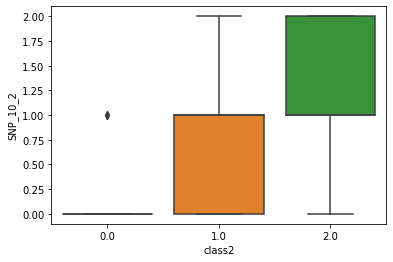

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

labelDF = pd.read_csv('./labelDF.csv')
sns.boxplot(y='SNP_10_2',x='class2',data=labelDF)

In [ ]:
def get_x_y(df):
    if 'class' in df.columns:
        df_x = df.drop(columns=['id', 'class'])
        df_y = df['class']
        return df_x, df_y
    else:
        df_x = df.drop(columns=['id'])
        return df_x
    
    
train_x, train_y = get_x_y(train)
test_x = get_x_y(test)

class_le = preprocessing.LabelEncoder()
snp_le = preprocessing.LabelEncoder()
snp_col = [f'SNP_{str(x).zfill(2)}' for x in range(1,16)]



snp_data = []
for col in snp_col:
    snp_data += list(train_x[col].values)
    
    
    
train_y = class_le.fit_transform(train_y)
snp_le.fit(snp_data)
for col in train_x.columns:
    if col in snp_col:
        train_x[col] = snp_le.transform(train_x[col])
        test_x[col] = snp_le.transform(test_x[col])
        

train_y = np_utils.to_categorical(train_y)
    
scaler = StandardScaler()
train_x[:] = scaler.fit_transform(train_x[:])
test_x[:] = scaler.fit_transform(test_x[:])   
    
clf=Sequential()
clf.add(Dense(100, input_shape=(19,)))
clf.add(Dense(3, input_dim=4))
clf.add(Activation('sigmoid'))


clf.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#clf.compile(optimizer=tf.keras.optimizers.Adam(), 
#              loss='categorical_crossentropy', 
#              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

clf.fit(train_x, train_y, epochs=10, batch_size=5)

In [45]:
preds = clf.predict(test_x)
pred=[]
for i in range(175):
    a = np.argmax(preds[i])
    pred.append(a)
print(pred)

submit = pd.read_csv('./sample_submission.csv')
submit['class'] = class_le.inverse_transform(pred)
submit.to_csv('./answer/submit_Keras6.csv', index=False)

6/6 [==============================] - 0s 3ms/step
[0, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 2, 1, 1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 2, 1, 1, 0, 1, 2, 2, 1, 1]


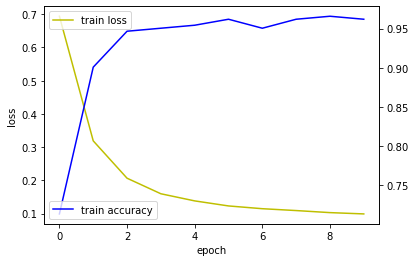

In [36]:
%matplotlib inline
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(clf.history['loss'], 'y', label = 'train loss')
acc_ax.plot(clf.history['accuracy'], 'b', label = 'train accuracy')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_xlabel('accuracy')

loss_ax.legend(loc = 'upper left')
acc_ax.legend(loc = 'lower left')

plt.show()